<a href="https://colab.research.google.com/github/AkyLast/Digit_Recognition/blob/main/neural_network_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Criando uma Rede Neural Capaz de Identificar Números Escritos**

## 1. Importação de bibliotecas e ferramentas necessárias

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## 2. Carregamento e análise inicial do conjunto de dados

In [213]:
df = pd.read_csv("NumbersWritten.csv")

In [214]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Classification
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [215]:
df["Classification"].value_counts()

,count
Classification,
3,183
1,182
5,182
4,181
6,181
9,180
7,179
0,178
2,177


### 2.1 Extração de índices para visualização das imagens do dataset

In [216]:
indices = []
for i in range(10):
  classe = df.loc[df["Classification"] == i]

  for indice in classe.tail(1).index:
    indices.append(indice)

imagens = df.iloc[:, :-1].to_numpy().reshape(-1, 8, 8)

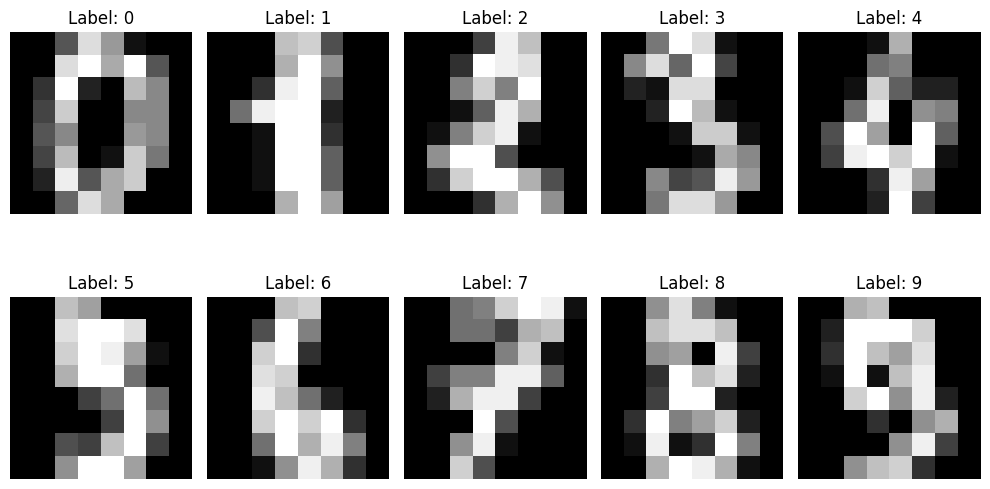

In [217]:
plt.figure(figsize = (10, 6))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(imagens[i], cmap = "gray")
  plt.title(f"Label: {i}")
  plt.axis("off")
plt.tight_layout()
plt.show()

## 3. Pré-processamento e preparação dos dados para treinamento, teste e validação


### 3.1 Extração de índices para dados de previsão:

In [218]:
indices = []
for i in range(10):
  numClass = df["Classification"].loc[df["Classification"] == i]
  param = numClass.tail(len(numClass) // 10).index

  for j in param:
    indices.append(j)

In [219]:
df_previsao = df.iloc[indices]
df = df.drop(indices, axis = 0)
df_previsao["Classification"].value_counts()

,count
Classification,
1,18
3,18
4,18
5,18
6,18
9,18
0,17
2,17
7,17


### 3. 2 Divisão dos dados em conjuntos:

In [220]:
X = df.drop("Classification", axis = 1)
y = df["Classification"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

y_train_classfication = to_categorical(y_train, num_classes = 10)
y_val_classfication = to_categorical(y_val, num_classes = 10)

X_test = df_previsao.drop("Classification", axis = 1)
y_test = df_previsao["Classification"]

## 4. Construção, treinamento e visualização do modelo de rede neural:

In [229]:
model = Sequential([
    Input(shape = (64,)),
    Dense(10, activation = "linear"),
    Dense(16, activation = "relu"),
    Dense(32, activation = "relu"),
    Dense(16, activation = "relu"),
    Dense(10, activation = "softmax")
])

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,068 (8.08 KB)

 Trainable params: 2,068 (8.08 KB)

 Non-trainable params: 0 (0.00 B)

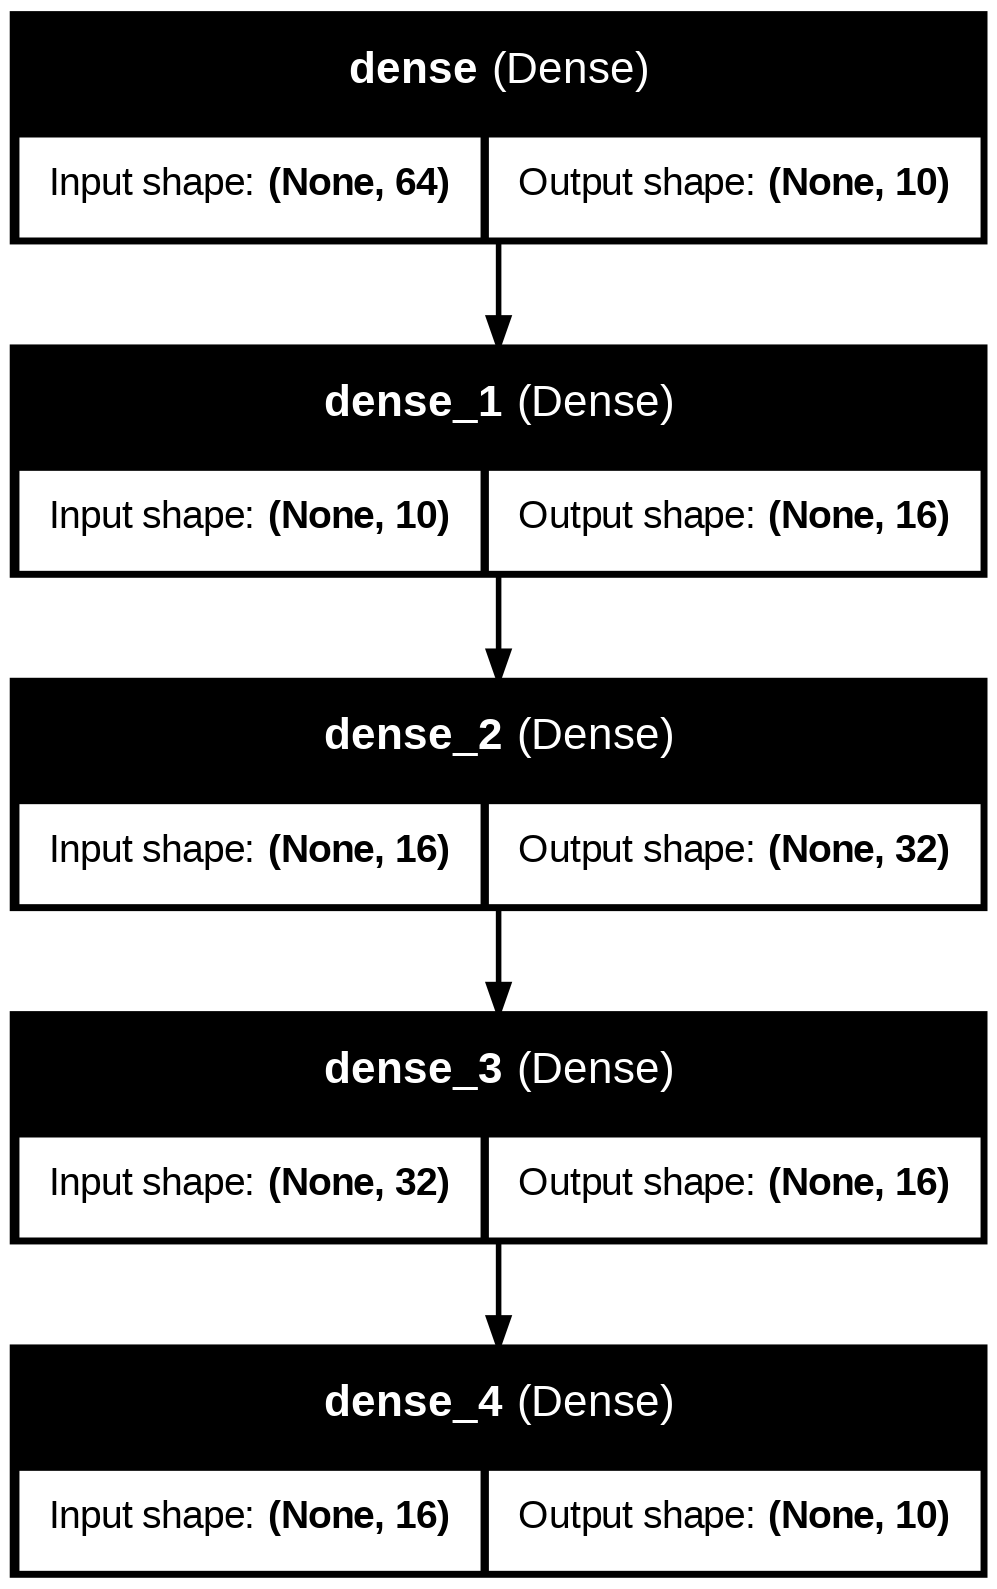

In [234]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [231]:
history = model.fit(
    X_train, y_train_classfication,
    validation_data = (X_val, y_val_classfication),
    epochs = 100,
    verbose = 1
  )

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0872 - loss: 2.9140 - val_accuracy: 0.3015 - val_loss: 1.9151
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3504 - loss: 1.8802 - val_accuracy: 0.4892 - val_loss: 1.5221
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5271 - loss: 1.4013 - val_accuracy: 0.6554 - val_loss: 1.0856
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6627 - loss: 1.0050 - val_accuracy: 0.7538 - val_loss: 0.7861
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7692 - loss: 0.6900 - val_accuracy: 0.7969 - val_loss: 0.6200
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8587 - loss: 0.4696 - val_accuracy: 0.8185 - val_loss: 0.5287
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8951 - loss: 0.3832 - val_accuracy: 0.8554 - val_loss: 0.4495
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8997 - loss: 0.3117 - val_accuracy: 0.8677 - 

## 6. Visualização da perda e precisão de validação:

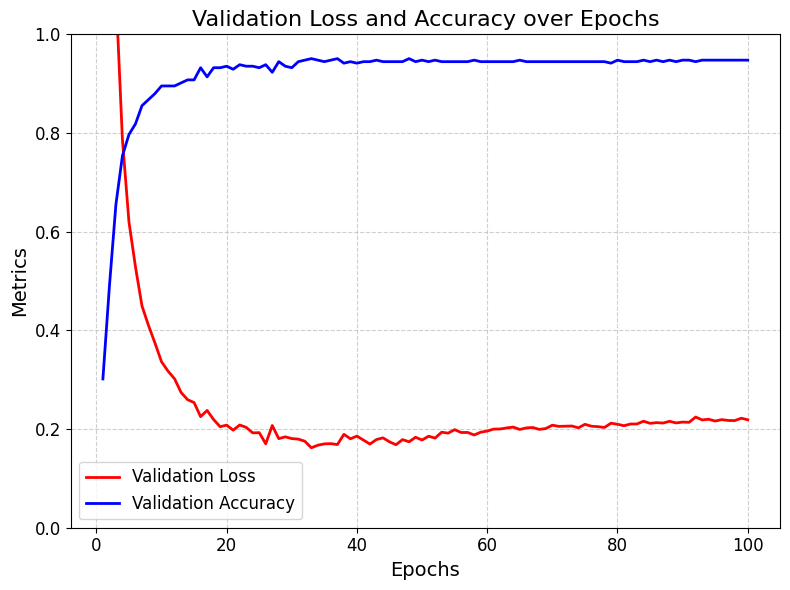

In [232]:
epochs = list(range(1, 101))

plt.figure(figsize=(8, 6))
plt.plot(epochs, history.history["val_loss"], color="red", label="Validation Loss", linewidth=2)
plt.plot(epochs, history.history["val_accuracy"], color="blue", label="Validation Accuracy", linewidth=2)
plt.title("Validation Loss and Accuracy over Epochs", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Metrics", fontsize=14)
plt.legend(fontsize=12, loc="best")
plt.grid(linestyle="--", alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

## 7. Predição e avaliação do modelo de rede neural:

In [233]:
predicao = model.predict(X_test)
y_pred = np.argmax(predicao, axis = 1)

print("Acc:", accuracy_score(y_test, y_pred))
print("\n", classification_report(y_test, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Acc: 0.9261363636363636

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.82      1.00      0.90        18
           2       0.94      1.00      0.97        17
           3       1.00      0.67      0.80        18
           4       1.00      0.94      0.97        18
           5       0.94      0.94      0.94        18
           6       0.95      1.00      0.97        18
           7       1.00      1.00      1.00        17
           8       0.70      0.82      0.76        17
           9       1.00      0.89      0.94        18

    accuracy                           0.93       176
   macro avg       0.94      0.93      0.93       176
weighted avg       0.94      0.93      0.93       176

